split data for every zone
===


In [186]:
import numpy as np
from numpy import genfromtxt
from learning_model import *
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler
from array import array
from keras.utils import to_categorical
from keras.utils import np_utils
#from ann_visualizer.visualize import ann_viz
import config
import pandas as pd


In [170]:
#read the zone in every points on field
pci_result_zone = np.genfromtxt('pci_result_zone.csv', delimiter=',')
print (pci_result_zone)
#read the raw data 
train_part_test = np.genfromtxt('set3_mod_part.csv', delimiter=',')
pixel_pos = np.genfromtxt('pixel_pos.csv', delimiter=',')
data_test = np.genfromtxt('rem_test.csv', delimiter=',')
print (train_part_test)
print (data_test)
print (pixel_pos[1:,:])

[[  0.   0.  39.   1.]
 [  1.   0.  39.   1.]
 [  2.   0.  39.   1.]
 ...
 [102.  26.  42.   5.]
 [103.  26.  42.   5.]
 [104.  26.  42.   5.]]
[[664.  179.   39.  -94.1   2. ]
 [664.  179.   39.  -94.    2. ]
 [664.  179.   39.  -93.9   2. ]
 ...
 [253.  209.   37.  -83.2   1. ]
 [253.  209.   37.  -84.4   1. ]
 [253.  209.   37.  -83.6   1. ]]
[[ 74.3485  15.469   39.     -90.4   ]
 [ 73.957   14.056   39.     -89.7   ]
 [ 82.2115   7.5625  41.     -84.    ]
 ...
 [ 84.6085  17.9365  41.     -66.2   ]
 [ 59.6605   6.7105  39.     -93.6   ]
 [ 98.227   17.236   42.     -71.9   ]]
[[  0.   0.]
 [  1.   0.]
 [  2.   0.]
 ...
 [102.  26.]
 [103.  26.]
 [104.  26.]]


In [171]:
def convert_location_data(x, y) :
    '''
    lng = a * x1 - b * y2 + c 
    lat = a * x2 + b * y1 + d

    NEMO -> indoor position value
    (840, -351) -> (96.824, 0)
    (923, -179) -> (107.068, 15.874)
    '''
    a = 0.1185
    b = -0.003
    c = -1.81
    d = 39.842
 
    lng = a * x - b * y * (-1) + c - 4
    lat = a * y * (-1) + b * x + d - 0.5

    return lng, lat

In [172]:
train_part_test[:,0],train_part_test[:,1] = convert_location_data(train_part_test[:,0],train_part_test[:,1])
print (train_part_test)
train_part_test[:,0] = np.around(train_part_test[:,0])
train_part_test[:,1] = np.around(train_part_test[:,1])
data_test[:,0] = np.around(data_test[:,0])
data_test[:,1] = np.around(data_test[:,1])
print (train_part_test)
print (data_test)


[[ 72.337   16.1385  39.     -94.1      2.    ]
 [ 72.337   16.1385  39.     -94.       2.    ]
 [ 72.337   16.1385  39.     -93.9      2.    ]
 ...
 [ 23.5435  13.8165  37.     -83.2      1.    ]
 [ 23.5435  13.8165  37.     -84.4      1.    ]
 [ 23.5435  13.8165  37.     -83.6      1.    ]]
[[ 72.   16.   39.  -94.1   2. ]
 [ 72.   16.   39.  -94.    2. ]
 [ 72.   16.   39.  -93.9   2. ]
 ...
 [ 24.   14.   37.  -83.2   1. ]
 [ 24.   14.   37.  -84.4   1. ]
 [ 24.   14.   37.  -83.6   1. ]]
[[ 74.   15.   39.  -90.4]
 [ 74.   14.   39.  -89.7]
 [ 82.    8.   41.  -84. ]
 ...
 [ 85.   18.   41.  -66.2]
 [ 60.    7.   39.  -93.6]
 [ 98.   17.   42.  -71.9]]


In [173]:
df = pd.DataFrame(train_part_test,columns=["x","y","pci","rsrp","zone"])
print (df.head())

      x     y   pci  rsrp  zone
0  72.0  16.0  39.0 -94.1   2.0
1  72.0  16.0  39.0 -94.0   2.0
2  72.0  16.0  39.0 -93.9   2.0
3  72.0  16.0  39.0 -91.4   2.0
4  72.0  16.0  39.0 -90.9   2.0


PCI training
===

In [224]:
X = train_part_test[:,0:2]
y = train_part_test[:,2]
modelClassifier = KNeighborsClassifier(n_neighbors=3)
pci_pred = modelClassifier.fit(X, y).predict(data_test[:,0:2])
print(pci_pred)
n_accuracy = 0
for i in range(len(pci_pred)):
    if pci_pred[i] == data_test[i,2]: 
        n_accuracy = n_accuracy+1
print ("n_accuracy_pci==",n_accuracy)
print ("len(pci_pred)==",len(pci_pred))
acc = n_accuracy/(len(pci_pred))
print('pci accuracy: ',acc )

[41. 39. 41. ... 41. 39. 42.]
n_accuracy_pci== 5009
len(pci_pred)== 5496
pci accuracy:  0.9113901018922853


Predict pci and plot pci map
===

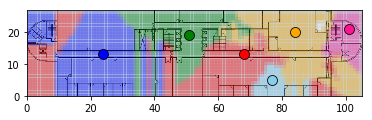

In [226]:
map_size = [105, 27]
x_resolution = map_size[0]
y_resolution = map_size[1]
#output = modelClassifier.predict(pixel_pos[1:,:])
#print(output)
np.savetxt('output.csv', output, delimiter=',', fmt='%f')
pci = []
pci_input =  [37, 38, 39, 40, 41, 42, 120, 151, 154, 1, 62]
pci_config = np.array(pci_input)
f = open('pci_result.csv', 'w') #write the pci result into file
f.write('x,y,pci,\n')
#z = np.reshape(output, (y_resolution, x_resolution))
#z[:] = map(list,zip(*z[::-1]))
#z = np.genfromtxt('z.csv', delimiter=',')
#z_pred = np.hstack((xy, pci_map_pred))
pci_pred = output.reshape(27,105)
z = np.reshape(output, (y_resolution, x_resolution))
np.savetxt('z.csv', z, delimiter=',', fmt='%f')
for j in range(y_resolution):
        for i in range(x_resolution) : 
            pci = z[j][i]
            if pci == 37 :#37
                #pci_real = pci_config[0] 
                plt.plot(round(i), round(j), color='blue', marker = 's', markersize=5, alpha=.1)
            elif pci == 38 :#38
                #pci_real = pci_config[1]
                plt.plot(round(i), round(j), color='green', marker = 's', markersize=5, alpha=.1 )
            elif pci == 39 :#39
                #pci_real = pci_config[2]
                plt.plot(round(i), round(j), color='red', marker = 's', markersize=5, alpha=.1 )
            elif pci == 40:#40
                #pci_real = pci_config[3]
                plt.plot(round(i), round(j), color='skyblue', marker = 's', markersize=5, alpha=.1)
            elif pci == 41:#41
                #pci_real = pci_config[4]
                plt.plot(round(i), round(j), color='orange', marker = 's', markersize=5, alpha=.1)
            elif pci == 42:#42
                #pci_real = pci_config[5]
                plt.plot(round(i), round(j), color='deeppink', marker = 's', markersize=5, alpha=.1)
            elif pci == 120:#120
                #pci_real = pci_config[6]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            elif pci == 151:#151
                #pci_real = pci_config[7]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            elif pci == 154:#154
                #pci_real = pci_config[8]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            else :                 
                pci_real = -1
                plt.plot(round(i), round(j), color='white', marker = 's', markersize=5, alpha=.1 )
            result = str(i) + ',' + str(j) + ',' + str(pci) +',' + '\n'
            f.write(result)  # python will convert \n to os.linesep

f.close()  # you can omit in most cases as the destructor will call it
img = plt.imread("./pic/51_5F-3.png")
plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
x, y = convert_location_data (260,215) #37
plt.plot(round(abs(x)), round(abs(y)), color='blue', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)

#SC1 (199, 151)
#x, y = convert_location_data (199, 868)
x, y = convert_location_data (480, 158) #38
plt.plot(round(abs(x)), round(abs(y)), color='green', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (630, 210) #39
plt.plot(round(abs(x)), round(abs(y)), color='red', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
#plt.plot(round(abs(x)), round(abs(y)), color='purple', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (710, 275) #40
plt.plot(round(abs(x)), round(abs(y)), color='skyblue', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (765, 145) #41
plt.plot(round(abs(x)), round(abs(y)), color='orange', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
#plt.plot(round(abs(x)), round(abs(y)), color='red', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)

x, y = convert_location_data (908, 130) #42
plt.plot(round(abs(x)), round(abs(y)), color='deeppink', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
plt.savefig('test', dpi=200)

Mutiple zone to train model then save to file
===

In [208]:
for i in range(1,7):
    print(i)
    zone = np.array([])
    zone = np.where(train_part_test[:,4] == i)
    print(train_part_test[zone[0],:])
    X = train_part_test[zone[0],0:3]
    y = train_part_test[zone[0],3]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    model = KNeighborsRegressor(n_neighbors=3)
    model.fit(X_train, y_train)
    filename = 'finalized_model_' + str(i) +'-' + '.sav'
    pickle.dump(model, open(filename, 'wb'))
    y_pred = model.predict(X_test)
    zone_allpoint = np.where(pci_result_zone[:,3] == i)
    print (len(zone_allpoint))
    predict_zone = model.predict(pci_result_zone[zone_allpoint[0],0:3])
    print(len(predict_zone))
    #predict_zone_every = np.append(pci_result_zone[zone_allpoint[0],0:3],predict_zone)
    name = './zone_result/zone_predict_' + str(i) +'.csv'
    df_loc = pd.DataFrame(pci_result_zone[zone_allpoint[0],0:3],columns=['x','y','pci'])
    df_rsrp = pd.DataFrame(predict_zone,columns=['rsrp'])
    df_result = pd.concat([df_loc,df_rsrp],axis=1)
    print(str(i)+"==="+"df==",df)
    df_result.to_csv(name,index=False,columns=['x','y','pci','rsrp'])
    #df_result = []
    
    #np.savetxt(name, predict_zone_every, delimiter=',', fmt='%f')
    #print("X_test",X_test)
    #print("y_pred",y_pred)
    #print("predict_zone",predict_zone)
    print("[MSE]==",mean_squared_error(y_test, y_pred))
    print("[RMSE]==",mean_squared_error(y_test, y_pred)**(0.5))
    loaded_model = pickle.load(open(filename, 'rb'))
df1 = pd.read_csv('./zone_result/zone_predict_1.csv')
df2 = pd.read_csv('./zone_result/zone_predict_2.csv')  
df3 = pd.read_csv('./zone_result/zone_predict_3.csv')  
df4 = pd.read_csv('./zone_result/zone_predict_4.csv')  
df5 = pd.read_csv('./zone_result/zone_predict_5.csv')
df6 = pd.read_csv('./zone_result/zone_predict_6.csv')  
df_merge_list = [df1,df2,df3,df4,df5,df6]
df_merge_result = pd.concat(df_merge_list)
df_merge_result.to_csv('./zone_result/zone_predict_total.csv', encoding='utf-8', index=False,columns=['x','y','pci','rsrp'])
'''
    zone_allpoint = np.where(pci_result_zone[:,3] == i)
    #rint (zone_allpoint)
    print(pci_result_zone[zone_allpoint,0:3])
    predict_zone = loaded_model.predict(pci_result_zone[zone_allpoint,0:3])
    name = 'zone_predict_' + str(i) +'-' + '.csv'
    np.savetxt(name, predict_zone, delimiter=',', fmt='%f')
    result = loaded_model.score(X_test, y_test)
    #print("load result==",result)
'''

1
[[ 69.   13.   39.  -64.7   1. ]
 [ 69.   13.   39.  -65.6   1. ]
 [ 69.   13.   39.  -65.6   1. ]
 ...
 [ 24.   14.   37.  -83.2   1. ]
 [ 24.   14.   37.  -84.4   1. ]
 [ 24.   14.   37.  -83.6   1. ]]
1
502
1===df==           x     y   pci  rsrp  zone
0      72.0  16.0  39.0 -94.1   2.0
1      72.0  16.0  39.0 -94.0   2.0
2      72.0  16.0  39.0 -93.9   2.0
3      72.0  16.0  39.0 -91.4   2.0
4      72.0  16.0  39.0 -90.9   2.0
5      72.0  16.0  39.0 -91.8   2.0
6      72.0  16.0  39.0 -93.7   2.0
7      72.0  16.0  39.0 -91.8   2.0
8      72.0  16.0  39.0 -91.3   2.0
9      72.0  16.0  39.0 -90.9   2.0
10     72.0  16.0  39.0 -92.2   2.0
11     72.0  16.0  39.0 -91.6   2.0
12     72.0  16.0  39.0 -92.2   2.0
13     72.0  16.0  39.0 -93.1   2.0
14     72.0  16.0  39.0 -89.6   2.0
15     72.0  16.0  39.0 -88.8   2.0
16     72.0  16.0  39.0 -90.6   2.0
17     72.0  16.0  39.0 -91.1   2.0
18     72.0  16.0  39.0 -88.6   2.0
19     72.0  16.0  39.0 -88.1   2.0
20     72.0  16.0  39.0

'\n    zone_allpoint = np.where(pci_result_zone[:,3] == i)\n    #rint (zone_allpoint)\n    print(pci_result_zone[zone_allpoint,0:3])\n    predict_zone = loaded_model.predict(pci_result_zone[zone_allpoint,0:3])\n    name = \'zone_predict_\' + str(i) +\'-\' + \'.csv\'\n    np.savetxt(name, predict_zone, delimiter=\',\', fmt=\'%f\')\n    result = loaded_model.score(X_test, y_test)\n    #print("load result==",result)\n'

Plot rsrp map
===

[[   0.            0.           39.         -121.83333333]
 [   1.            0.           39.         -121.83333333]
 [   2.            0.           39.         -121.83333333]
 ...
 [ 102.           26.           42.         -106.33333333]
 [ 103.           26.           42.         -106.33333333]
 [ 104.           26.           42.         -106.33333333]]
2835


"\ndf_merge_result.drop(['pci'])\ndf_merge_result_array = df_merge_result[1:,:].values\nprint(df_merge_result_array)\nheatmap_rsrp = plt.pcolor(df_merge_result,cmap='jet',alpha=1)\n"

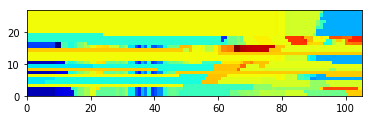

In [250]:
df_total = pd.read_csv('./zone_result/zone_predict_total.csv')  
df_total_sort = df_total.sort_values(by=['y','x'])
#print (df_total_sort)
rsrp_map_frompd = df_total_sort.values
print (rsrp_map_frompd)
print (len(rsrp_map_frompd))
rsrp_map_pd = (rsrp_map_frompd[:,3]).reshape(27, 105)
img = plt.imread("./pic/51_5F-3.png")
plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
heatmap_rsrp = plt.pcolor(rsrp_map_pd,cmap='jet',alpha=1)
plt.savefig('./result_rsrp/rsrp_map.png')
#sns.heatmap(rsrp_map_pd, cmap = 'jet')
'''
df_merge_result.drop(['pci'])
df_merge_result_array = df_merge_result[1:,:].values
print(df_merge_result_array)
heatmap_rsrp = plt.pcolor(df_merge_result,cmap='jet',alpha=1)
'''

Merge to 51-5F map
===

In [282]:
#bk = Image.open('5f_map.png')
bk = Image.open('823.PNG')
print (bk.size)
heatmap_rsrp = Image.open('./result_rsrp/rsrp_map.png')
print (heatmap_rsrp.size)
#heatmap_rsrp = heatmap_rsrp.resize((501, 130))
bk = bk.resize((432, 288))
blended = Image.blend(heatmap_rsrp, bk, alpha=0.1)
blended.save('./result_rsrp/zone_rsrp.png')

(623, 411)
(432, 288)
